# Wakefulness Watcher

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random 
import pickle
from tensorflow import keras
from keras import layers
import cv2
import os
import winsound

## Dataset Creation For Training

In [ ]:
img_size = 224                                              # resize to 224px
Data = 'D:\SummerProject\Eye DataSet\Train'                 # data directory
Classes = ['Closed Eyes','Open Eyes']                       # categories of data
trainingData = []

def createTrainingset():
    ind=0
    for type in Classes:
        path= os.path.join(Data,type)                       # path of img in 'Directory/Category'
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # reading img as an array of values
                rgb = cv2.cvtColor(img_arr,cv2.COLOR_GRAY2RGB)
                new_arr = cv2.resize(rgb,(img_size,img_size))                       # resizing img for uniformity
                trainingData.append([new_arr,ind])
            except:
                pass
        ind+=1
createTrainingset()     


In [3]:
print(len(trainingData))            # check

3058


## Randomizing the dataset

In [4]:
import random 
random.shuffle(trainingData)


## Collecting features and their respective label 

In [5]:
X=[]
y=[]
for features,label in trainingData:
    #features = np.array(features)
    X.append(features)
    y.append(label)
X=np.array(X)                           # dtype numpy array
X.reshape(-1,img_size,img_size,3)
y=np.array(y)                           # dtype numpy array

In [6]:
X = X/255.0         # normalizing data
Y = np.array(y)     # [[]] ig


## Pickling

In [2]:
import pickle

In [7]:
pickle.dump(X, open("X.pickle",'wb'))
pickle.dump(y, open("y.pickle",'wb'))

In [3]:
X = pickle.load(open("X.pickle",'rb'))
y = pickle.load(open("y.pickle",'rb'))

## DeepLearning Model for Training

In [2]:
from tensorflow import keras
from keras import layers

In [9]:
model = keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

## Transfer Learning from model

In [10]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [11]:
flatLayer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flatLayer)                                                       # (1)-- no of units (flatlayer)--  
final_output = layers.Activation('sigmoid')(final_output)

newmodel = keras.Model(inputs = base_input, outputs = final_output)

In [12]:
for layer in model.layers:
    layer.trainable = False
newmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

+ Note: 
The func()() notation in Python represents the chaining or cascading of function calls (function returns another function)
<details>
 <summary>in-depth</summary>
    In the code layers.Activation('sigmoid')(final_output), layers.Activation('sigmoid') returns a function or object that can be called with an argument.<br>
    By adding (final_output) immediately after layers.Activation('sigmoid'), we invoke the function and pass final_output as the argument.
</details>

## Model Compilation and Fitting

In [ ]:
#compiling
newmodel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#fitting
newmodel.fit(X,y,epochs = 1, validation_split = 0.1)     
newmodel.save('newmodel')  

## Checking For Predictions

In [2]:
img_size = 224
newimg = cv2.imread('D:\Projects\SummerProject\Eye DataSet\Test\Closed Eyes\s0016_01314_1_0_0_1_1_01.png',cv2.IMREAD_GRAYSCALE)
newimg = cv2.cvtColor(newimg,cv2.COLOR_GRAY2RGB)
new_arr = cv2.resize(newimg,(img_size,img_size))

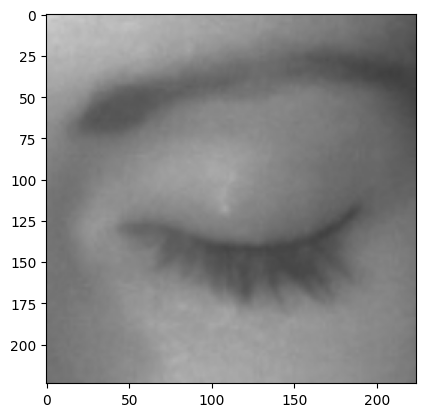

In [3]:
plt.imshow(new_arr)

In [4]:
x_input = np.array(new_arr).reshape(1,img_size,img_size,3)
x_input = x_input/255.0
print(x_input.shape)

(1, 224, 224, 3)


In [ ]:
newmodel = tf.keras.models.load_model('newmodel')

In [6]:
prediction = newmodel.predict(x_input)

1/1 [==============================] - 1s 1s/step


In [7]:
prediction

array([[0.02794354]], dtype=float32)

## FaceDetection and Extracting Eyes

In [8]:
newimg = cv2.imread('./Eye DataSet/th-3586410498.jpg')
#plt.imshow(cv2.cvtColor(newimg ,cv2.COLOR_BGR2RGB))
#newimg = cv2.resize(newimg,(img_size,img_size))


In [9]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [10]:
gray = cv2.cvtColor(newimg,cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for (x, y, w, h) in eyes:
    cv2.rectangle(newimg, (x,y), (x+w,y+h), (0,255,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = newimg[y:y+h, x:x+w]
    eyee = eye_cascade.detectMultiScale(roi_gray)
    if len(eyee)==0 : print("No eyes detectede")
    else:
        for (ex, ey, ew, eh) in eyee:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

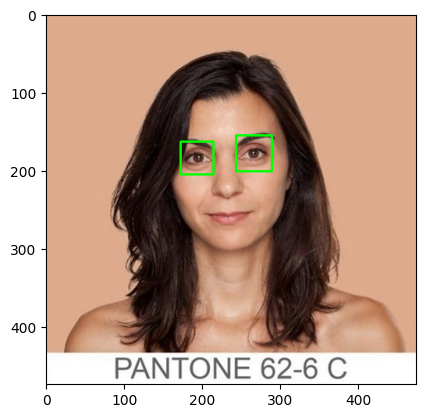

In [11]:
plt.imshow(cv2.cvtColor(newimg,cv2.COLOR_BGR2RGB))

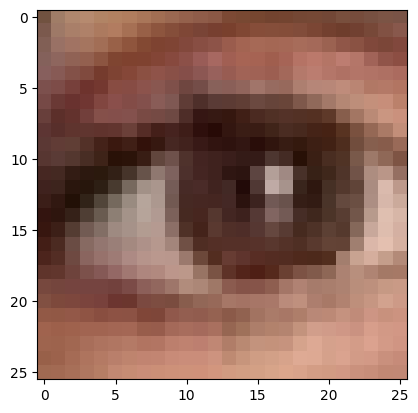

In [12]:
plt.imshow( cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [13]:
fimg = cv2.resize(eyes_roi, (img_size,img_size))
fimg = np.expand_dims(fimg,axis=0)
fimg = fimg/255.0

In [14]:
fimg.shape

(1, 224, 224, 3)

In [15]:
newmodel.predict(fimg)

1/1 [==============================] - 1s 619ms/step


array([[0.95419854]], dtype=float32)

In [16]:
## Detection on Video
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')      #for face detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')                      #for eye detection

Connecting to a webcam

In [17]:
cap = cv2.VideoCapture(0)               

if not cap.isOpened():
    cap = cv2.VideoCapture(1) 
if not cap.isOpened():
    raise IOError("Cannot open webcam")

Openning the live vieo capture to detect face and eyes, then predict whether the eyes are opened or closed

In [ ]:
while True:
    ret, frame = cap.read()                                         # collecting imgs frame by frame
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)                   # gray img input
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)                 # eye detection

    for (x, y, w, h) in eyes:                                       # extracting eye
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyee = eye_cascade.detectMultiScale(roi_gray)
        if len(eyee)==0 : print("No eyes detected")
        else:
            for (ex, ey, ew, eh) in eyee:
                eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]
    
    final_img = cv2.resize(eyes_roi, (img_size,img_size))           # processing imgs for prediction
    final_img = np.expand_dims(final_img,axis=0)
    final_img = final_img/255.0

    predictions = newmodel.predict(final_img)                       # prediction
    if (predictions>0.3):
        status = 'Open Eyes'
    else:
        status = 'Close Eyes'

    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)     
    print(faceCascade.empty())                                      
    faces = faceCascade.detectMultiScale(gray,1.1,4)                # detecting face

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)        # framing the detected face
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status,                                      # showing all the frames detected and predictions on the screen
                (50,50), font, 
                3, (0,0,255),
                cv2.LINE_4 )
    cv2.imshow('Wakefulness Watcher', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):                           # break on pressing 'q' key
        break

cap.release()
cv2.destroyAllWindows()
    